In [14]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics
import pandas as pd

In [6]:
delta = 0.001 # time interval = 1 ms
E = 4.47  # Voltage source
R = 10.6  # Resistor

files = ['Lamp1.txt','Lamp2.txt','Both.txt']
filenames = ['Lamp 1', 'Lamp 2', 'Both Lamps']

In [7]:
def compute_power(voltages):
  global E,R
  return [(E-v)*(v/R) for v in voltages]

In [8]:
def plot_curves(curves, delta, totaltime = None, title=''):
    plt.close()
    plt.cla()
    plt.clf()
    if not totaltime:
      figure(figsize=(18,6))
      for i in range(len(curves)):
          t = list(range(len(curves[i])))
          y = curves[i]
          plt.plot(t,y)
    else:
      figure(figsize=(12,6))
      for i in range(len(curves)):
          t = list(range(totaltime))
          y = curves[i][:totaltime]
          plt.plot(t,y)
      
    plt.xlabel('Time (seconds)')
    plt.ylabel('Power (watt)')
    plt.title(title)
    plt.savefig(title+'.png')
    plt.show();

In [9]:
def plotboxplot(power, title):
  plt.close()
  plt.cla()
  plt.clf()
  fig = plt.figure(figsize =(8, 5))
  # Creating plot
  plt.boxplot(power)
  plt.title(title)
  plt.savefig(title+'.png')
  plt.show();
  print('MEAN : ',mean(power))
  print('STD : ',std(power))

In [10]:
def compute_avg(powers):
  avg = []
  zipped=[*zip(*powers)]
  for i in zipped:
    avg.append(statistics.mean(i))
  return avg

In [17]:
def save_csv(powers, totaltime, title = 'file'):
  dic = {'Power':powers[:totaltime], 'Time':list(range(totaltime))}
  df = pd.DataFrame(dic)
  df.to_csv(title+'.csv')
  print(title+'.csv saved')

In [12]:
def find_curves(voltages,upmean, downmean,threshold):
    upindices = []
    downindices = []
  
    diff = upmean - downmean
    for i in range(10,len(voltages)-10,1):
      if (voltages[i+10]-voltages[i-10])/diff >= threshold:
        upindices.append(i)
      if (voltages[i+10]-voltages[i-10])/diff < -threshold:
        downindices.append(i)

    upcurves = [voltages[upindices[i*20]:upindices[(i+1)*20-1]+1] for i in range(len(upindices)//20)]
    downcurves = [voltages[downindices[i*20]:downindices[(i+1)*20-1]+1] for i in range(len(downindices)//20)]

    return upcurves,downcurves

<Figure size 432x288 with 0 Axes>

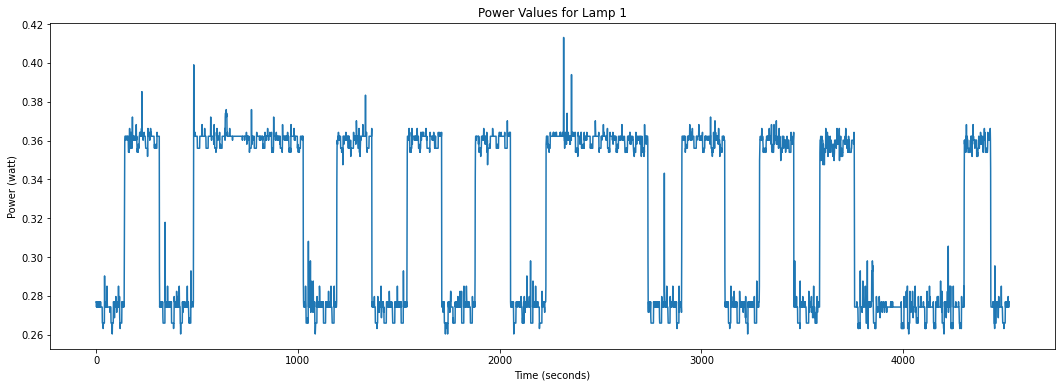

<Figure size 432x288 with 0 Axes>

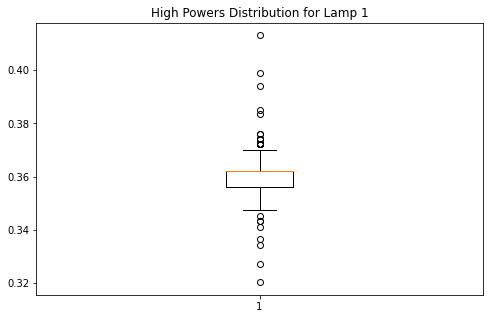

MEAN :  0.3600652344326039
STD :  0.004078191431376169


<Figure size 432x288 with 0 Axes>

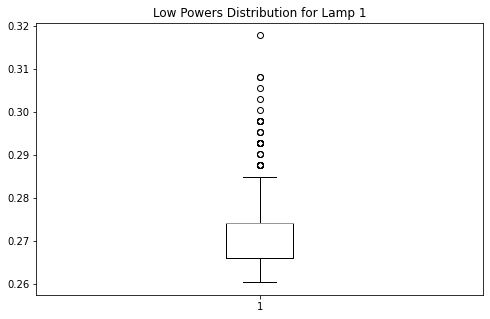

MEAN :  0.27317848426171926
STD :  0.00553340045996507


<Figure size 432x288 with 0 Axes>

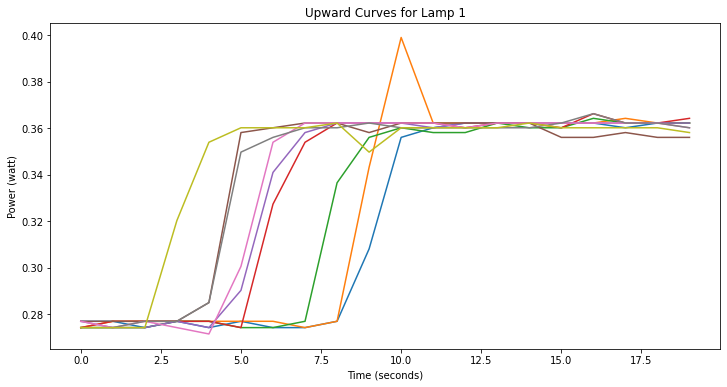

<Figure size 432x288 with 0 Axes>

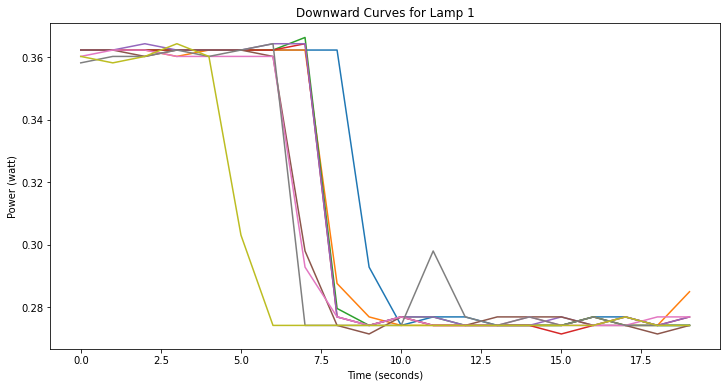

<Figure size 432x288 with 0 Axes>

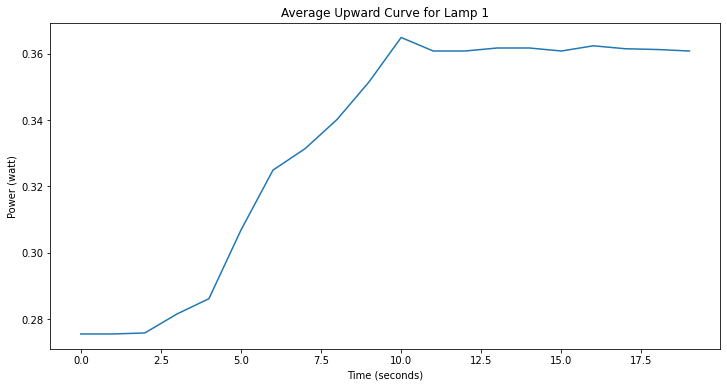

<Figure size 432x288 with 0 Axes>

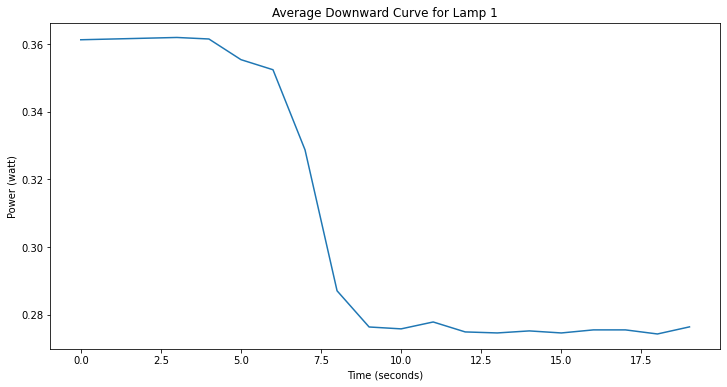

Lamp 1 Upward Curves.csv saved
Lamp 1 Downward Curves.csv saved


<Figure size 432x288 with 0 Axes>

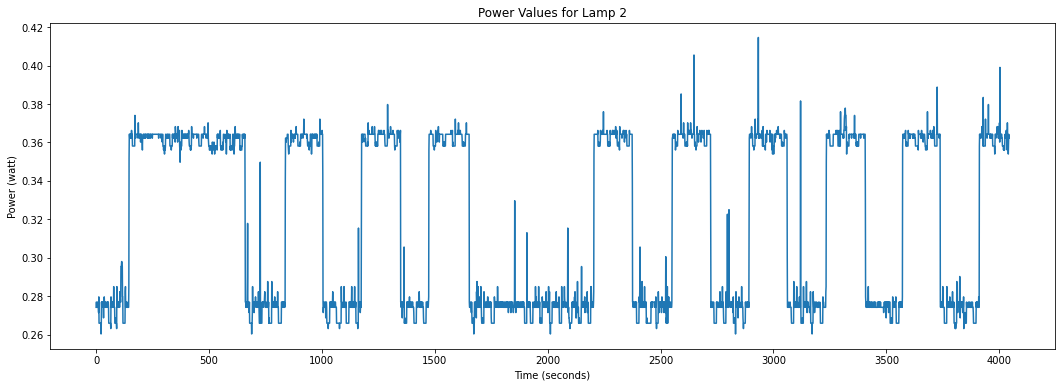

<Figure size 432x288 with 0 Axes>

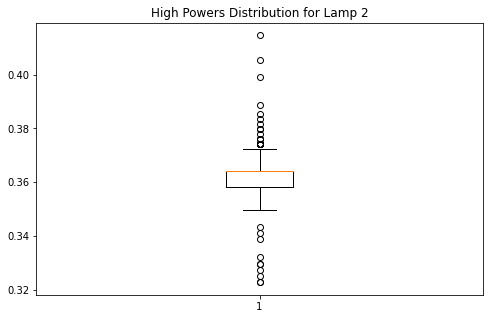

MEAN :  0.36242413677380864
STD :  0.00442258317611534


<Figure size 432x288 with 0 Axes>

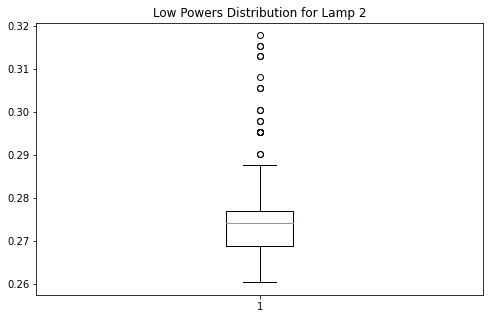

MEAN :  0.2735710511329157
STD :  0.00562847635971945


<Figure size 432x288 with 0 Axes>

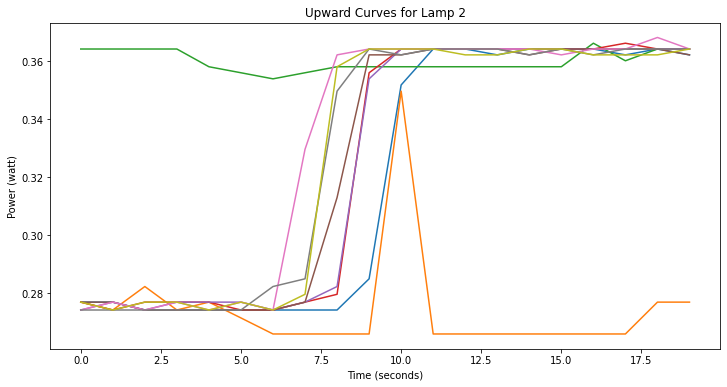

<Figure size 432x288 with 0 Axes>

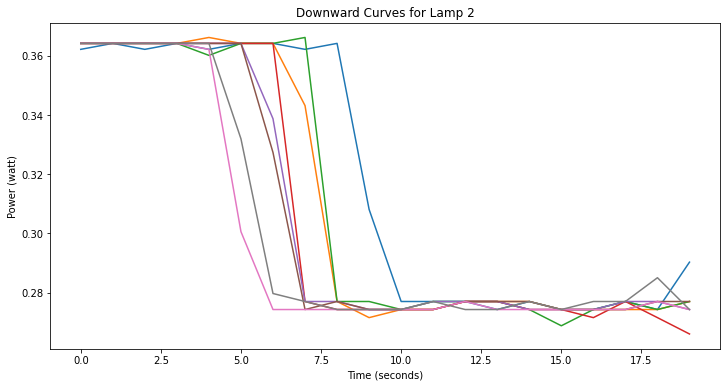

<Figure size 432x288 with 0 Axes>

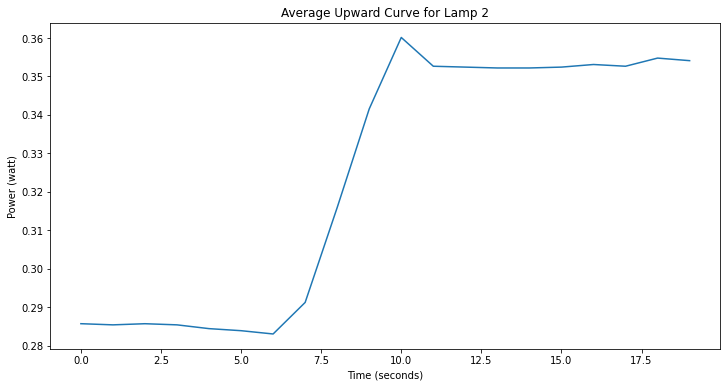

<Figure size 432x288 with 0 Axes>

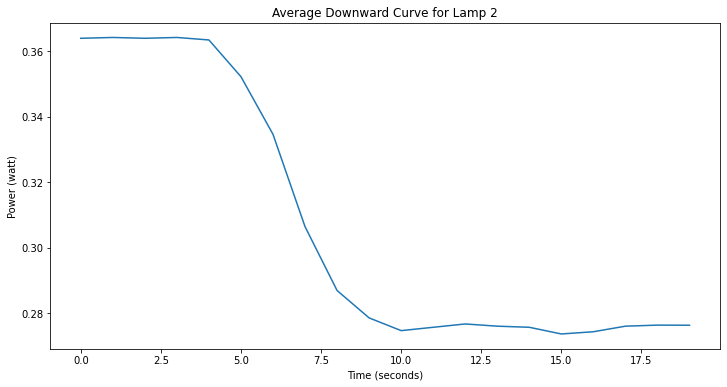

Lamp 2 Upward Curves.csv saved
Lamp 2 Downward Curves.csv saved


<Figure size 432x288 with 0 Axes>

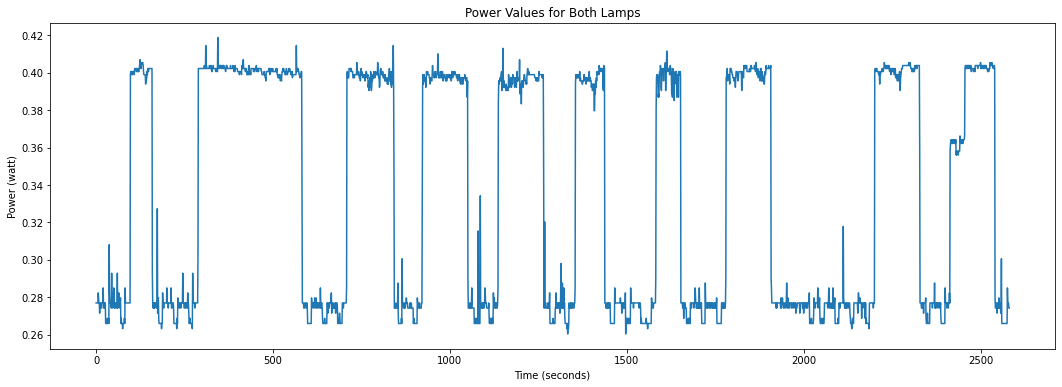

<Figure size 432x288 with 0 Axes>

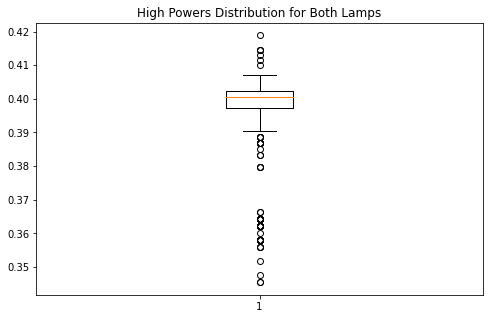

MEAN :  0.398301725025368
STD :  0.008207563023742646


<Figure size 432x288 with 0 Axes>

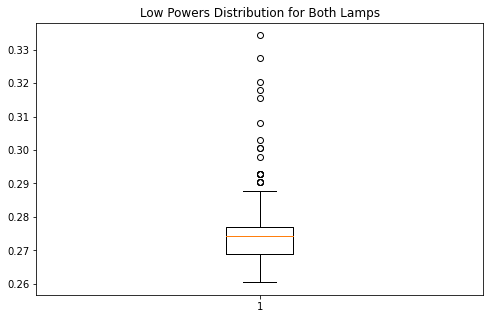

MEAN :  0.2740670472206487
STD :  0.0062932345224819795


<Figure size 432x288 with 0 Axes>

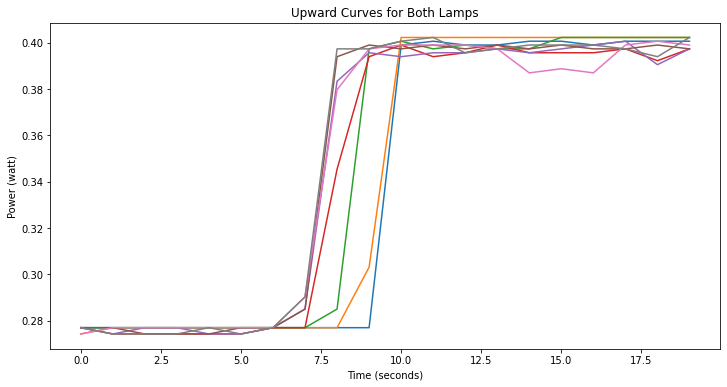

<Figure size 432x288 with 0 Axes>

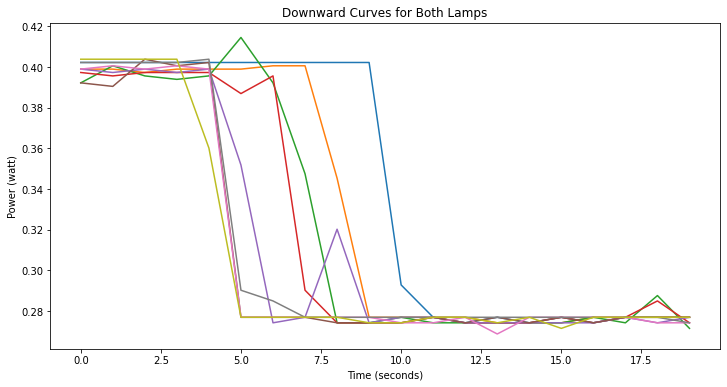

<Figure size 432x288 with 0 Axes>

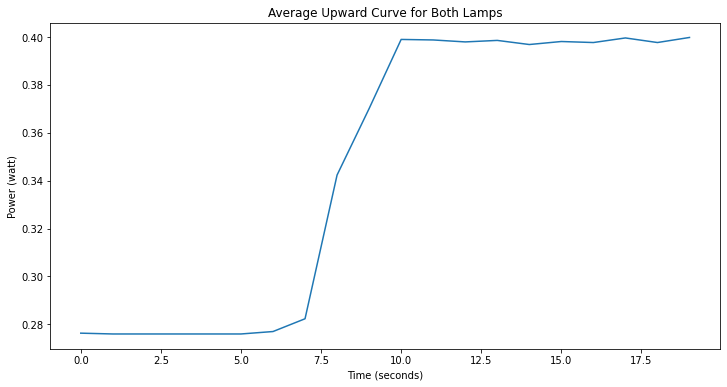

<Figure size 432x288 with 0 Axes>

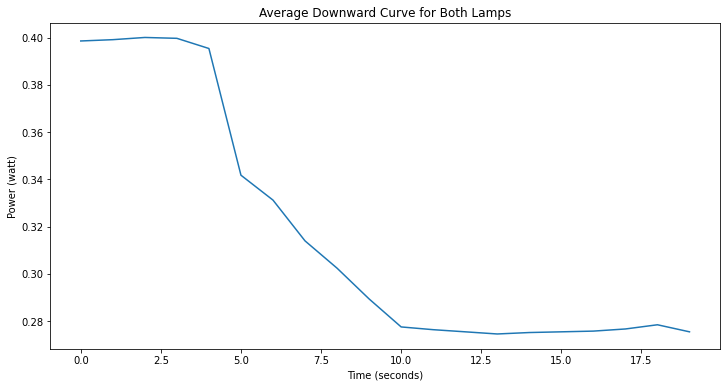

Both Lamps Upward Curves.csv saved
Both Lamps Downward Curves.csv saved


In [18]:
for i in range(len(files)):

  filename = filenames[i]

  # Reading the file
  with open(files[i]) as f:
      lines = f.readlines()
      voltages = [float(x.split()[-1]) for x in lines]
  
  # Ploting the whole power
  power = compute_power(voltages)
  plot_curves([power],delta, title = 'Power Values for '+filename)

  # Computing high and low powers
  highpowers = [p for p in power if p > mean(power)]
  lowpowers = [p for p in power if p <= mean(power)]
  
  # Ploting the high and low power distributions
  plotboxplot(highpowers, title = 'High Powers Distribution for '+filename)
  plotboxplot(lowpowers, title = 'Low Powers Distribution for '+filename)

  # Finding the Upward and Downward curves
  upcurves, downcurves = find_curves(power,mean(highpowers), mean(lowpowers),0.8)
  
  # Plotting the Upward and Downward curves
  plot_curves(upcurves,delta,20, title = 'Upward Curves for '+filename)
  plot_curves(downcurves,delta,20, title = 'Downward Curves for '+filename)

  # Finding the average Upward and Downward curves
  avg_upcurves = compute_avg(upcurves)
  avg_downcurves = compute_avg(downcurves)

  # Plotting the average Upward and Downward curves
  plot_curves([avg_upcurves],delta,20, title = 'Average Upward Curve for '+filename)
  plot_curves([avg_downcurves],delta,20, title = 'Average Downward Curve for '+filename)

  # Saving average curves for excel works
  save_csv(avg_upcurves,20,filename+' Upward Curves')
  save_csv(avg_downcurves,20,filename+' Downward Curves')